<a href="https://colab.research.google.com/github/medhinikulkarni/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #1 : Importing necessary libraries to read and clean the dataset

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Uploading a csv file for analysis
This is a dataset from one of Coursera's courses.

It consists of customer feedback (text), a rating and an already tagged feedbakc column, but we will be dropping that column and generating a sentiment score using VADER Lexicon method


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving amazon_reviews.csv to amazon_reviews.csv


In [ ]:
df = pd.read_csv('amazon_reviews.csv')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:
df=df.drop(columns=['feedback'],axis=1)
df.head()

,rating,date,variation,verified_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
dtypes: int64(1), object(3)
memory usage: 98.6+ KB


Above output shows us that there's one null value in the text feedback

Below we will remove the null values from the text feedback to avoid any errors further

In [ ]:
# Print rows where 'verified_reviews' is null
null_rows = df[df['verified_reviews'].isnull()]
print(null_rows)


     rating       date variation verified_reviews
473       2  29-Jun-18     White              NaN


In [ ]:
df = df.dropna(subset=['verified_reviews'])
null_rows = df[df['verified_reviews'].isnull()]
#checking if nulls are removed
print(null_rows)

Empty DataFrame
Columns: [rating, date, variation, verified_reviews]
Index: []


# #2 : Exploring the dataset

We'll now look into what the general feedback for this product is by viewing how the customer rated it as well as how long their text feedback was.

<Axes: xlabel='rating', ylabel='count'>

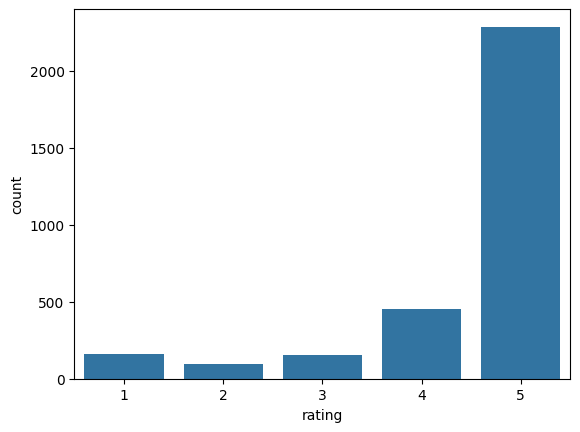

In [ ]:
# Plot the count plot for the ratings
sns.countplot(x = df['rating'])

In [ ]:
df['length'] = df['verified_reviews'].apply(len)
df

,rating,date,variation,verified_reviews,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,172
4,5,31-Jul-18,Charcoal Fabric,Music,5
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,380


<Axes: ylabel='Frequency'>

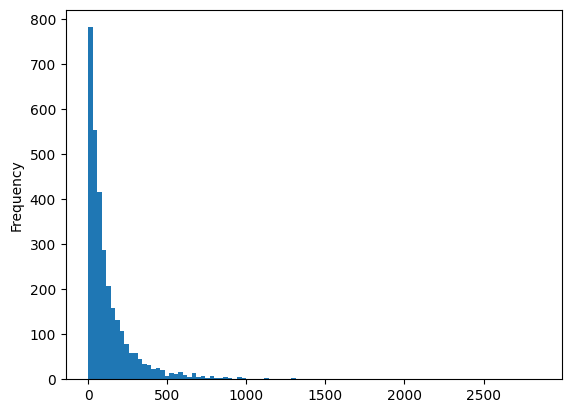

In [ ]:
# Plot the histogram for the length
df['length'].plot(bins=100, kind='hist')

# #3 : Generating sentiment value to each review using VADER Lexicon method


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['compound_score'] = df['verified_reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['compound_score'].apply(lambda x: 'Very Positive' if x >= 0.7 else ('Positive' if x >= 0.05 else ('Very Negative' if x <= -0.6 else ('Negative' if x <= -0.05 else 'Neutral'))))

df.describe()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,rating,date,variation,verified_reviews,length,compound_score,sentiment
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,13,0.6696,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,9,0.6360,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",195,-0.1280,Negative
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,172,0.9169,Very Positive
4,5,31-Jul-18,Charcoal Fabric,Music,5,0.0000,Neutral


Now that we have sentiment tagging for each review, we can visualise the positive and negative feedback in a word cloud.

First we remove any stop words/punctuations

In [ ]:
import string #punctuations
nltk.download('stopwords')
# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_cleaning(text):
    remove_punc =''.join([char for char in text if char not in string.punctuation])
    remove_stop = [word for word in remove_punc.split() if word.lower() not in stopwords.words('english')]
    return remove_stop

In [ ]:
df['clean_review']=df['verified_reviews'].apply(text_cleaning)
df

,rating,date,variation,verified_reviews,length,compound_score,sentiment,clean_review
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,13,0.6696,Positive,"[Love, Echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,9,0.6360,Positive,[Loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",195,-0.1280,Negative,"[Sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,172,0.9169,Very Positive,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,5,0.0000,Neutral,[Music]
...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",50,0.6467,Positive,"[Perfect, kids, adults, everyone]"
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",135,0.0000,Neutral,"[Listening, music, searching, locations, check..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",441,0.9485,Very Positive,"[love, things, running, entire, home, TV, ligh..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,380,0.0008,Neutral,"[complaint, sound, quality, isnt, great, mostl..."


Visualising how many reviews fall under each sentiment type


<Axes: xlabel='sentiment', ylabel='count'>

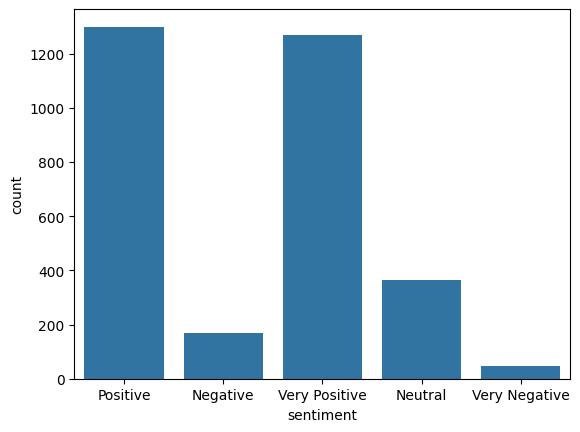

In [ ]:
sns.countplot(x = df['sentiment'])

Next we'll go ahead and divide the dataset into positive and negative to for individual word clouds


In [ ]:
negative = df[(df['sentiment'] == 'Very Negative') | (df['sentiment'] == 'Negative')]
negative

,rating,date,variation,verified_reviews,length,compound_score,sentiment,clean_review
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",195,-0.1280,Negative,"[Sometimes, playing, game, answer, question, c..."
24,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",179,-0.2892,Negative,"[got, second, unit, bedroom, expecting, sounds..."
50,5,30-Jul-18,Charcoal Fabric,"Excelente, lo unico es que no esta en español.",46,-0.2960,Negative,"[Excelente, lo, unico, es, que, esta, en, espa..."
109,4,30-Jul-18,Sandstone Fabric,The outlet does not work with it. Was disappoi...,59,-0.4767,Negative,"[outlet, work, disappointed]"
145,3,30-Jul-18,Sandstone Fabric,it's annoying that everything they show Alexa ...,211,-0.1531,Negative,"[annoying, everything, show, Alexa, able, down..."
...,...,...,...,...,...,...,...,...
3071,4,30-Jul-18,Black Dot,Enjoying it and still learning all the command...,164,-0.2796,Negative,"[Enjoying, still, learning, commands, Ran, one..."
3088,5,30-Jul-18,Black Dot,Dislike the volume. It does not sound loud eno...,50,-0.3818,Negative,"[Dislike, volume, sound, loud, enough]"
3122,3,30-Jul-18,Black Dot,I dislike that it confuses my requests all the...,52,-0.5994,Negative,"[dislike, confuses, requests, time]"
3127,4,30-Jul-18,Black Dot,works great but speaker is not the good for mu...,88,-0.1429,Negative,"[works, great, speaker, good, music, need, get..."


In [ ]:
positive = df[(df['sentiment']=='Very Positive') | (df['sentiment']=='Positive')]
positive

,rating,date,variation,verified_reviews,length,compound_score,sentiment,clean_review
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,13,0.6696,Positive,"[Love, Echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,9,0.6360,Positive,[Loved]
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,172,0.9169,Very Positive,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,172,0.8697,Very Positive,"[received, echo, gift, needed, another, Blueto..."
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",365,0.7096,Very Positive,"[Without, cellphone, cannot, use, many, featur..."
...,...,...,...,...,...,...,...,...
3143,5,30-Jul-18,Black Dot,Awesome device wish I bought one ages ago.,42,0.7783,Very Positive,"[Awesome, device, wish, bought, one, ages, ago]"
3144,5,30-Jul-18,Black Dot,love it,7,0.6369,Positive,[love]
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",50,0.6467,Positive,"[Perfect, kids, adults, everyone]"
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",441,0.9485,Very Positive,"[love, things, running, entire, home, TV, ligh..."


In [ ]:
positive_words = " ".join(positive['verified_reviews'].tolist())
# positive_words
negative_words = " ".join(negative['verified_reviews'].tolist())
# negative_words
print(len(positive_words),len(negative_words))

358439 42737


POSITIVE WORD CLOUD


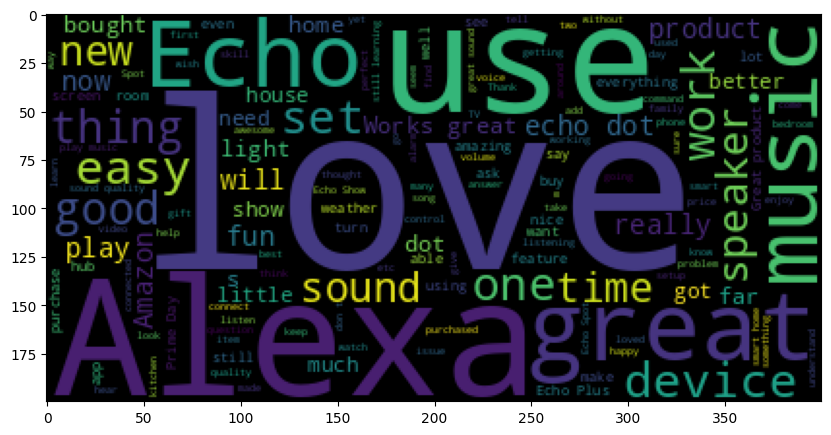

In [ ]:
# generating word clouds
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(positive_words))

NEGATIVE WORD CLOUD

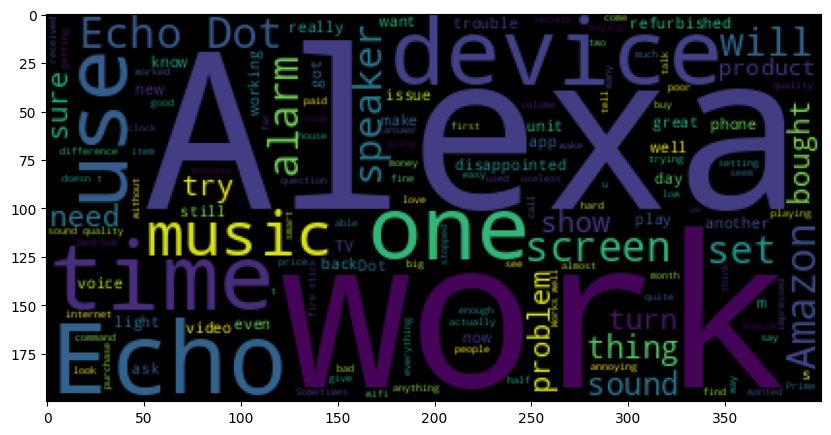

In [ ]:

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(negative_words))

# #4 : Preparing the dataset to train it on machine learning models

Removing neutral sentiment types and only using the above positive and negative sentiments to train and test

In [ ]:
union_df = pd.concat([positive, negative], ignore_index=True)
union_df

,rating,date,variation,verified_reviews,length,compound_score,sentiment,clean_review
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,13,0.6696,Positive,"[Love, Echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,9,0.6360,Positive,[Loved]
2,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,172,0.9169,Very Positive,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
3,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,172,0.8697,Very Positive,"[received, echo, gift, needed, another, Blueto..."
4,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",365,0.7096,Very Positive,"[Without, cellphone, cannot, use, many, featur..."
...,...,...,...,...,...,...,...,...
2781,4,30-Jul-18,Black Dot,Enjoying it and still learning all the command...,164,-0.2796,Negative,"[Enjoying, still, learning, commands, Ran, one..."
2782,5,30-Jul-18,Black Dot,Dislike the volume. It does not sound loud eno...,50,-0.3818,Negative,"[Dislike, volume, sound, loud, enough]"
2783,3,30-Jul-18,Black Dot,I dislike that it confuses my requests all the...,52,-0.5994,Negative,"[dislike, confuses, requests, time]"
2784,4,30-Jul-18,Black Dot,works great but speaker is not the good for mu...,88,-0.1429,Negative,"[works, great, speaker, good, music, need, get..."


In [ ]:
def score(text):
  if text=="Positive":
    return 1
  elif text=="Very Positive":
    return 1
  elif text=="Negative":
    return 0
  elif text=="Very Negative":
    return 0

union_df['score']=union_df['sentiment'].apply(score)
union_df

,rating,date,variation,verified_reviews,length,compound_score,sentiment,clean_review,score
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,13,0.6696,Positive,"[Love, Echo]",1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,9,0.6360,Positive,[Loved],1
2,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,172,0.9169,Very Positive,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",1
3,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,172,0.8697,Very Positive,"[received, echo, gift, needed, another, Blueto...",1
4,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",365,0.7096,Very Positive,"[Without, cellphone, cannot, use, many, featur...",1
...,...,...,...,...,...,...,...,...,...
2781,4,30-Jul-18,Black Dot,Enjoying it and still learning all the command...,164,-0.2796,Negative,"[Enjoying, still, learning, commands, Ran, one...",0
2782,5,30-Jul-18,Black Dot,Dislike the volume. It does not sound loud eno...,50,-0.3818,Negative,"[Dislike, volume, sound, loud, enough]",0
2783,3,30-Jul-18,Black Dot,I dislike that it confuses my requests all the...,52,-0.5994,Negative,"[dislike, confuses, requests, time]",0
2784,4,30-Jul-18,Black Dot,works great but speaker is not the good for mu...,88,-0.1429,Negative,"[works, great, speaker, good, music, need, get...",0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer=text_cleaning,dtype = np.uint8)
reviewscount = vectorizer.fit_transform(union_df['verified_reviews'])

In [ ]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [ ]:
print(reviewscount.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
reviewscount.shape

(2786, 4998)

In [ ]:
X = pd.DataFrame(reviewscount.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,4988,4989,4990,4991,4992,4993,4994,4995,4996,4997
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=union_df['score']
y

,score
0,1
1,1
2,1
3,1
4,1
...,...
2781,0
2782,0
2783,0
2784,0


In [ ]:
print(X.shape,y.shape)

(2786, 4998) (2786,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# #5 : We'll be using 4 models and then comparing its performance using classification metrics

The 4 models used below :
- Naive Bayes Classifier
- Gradient Boosting Classifier
- Logistic Regression Classifier
- Support Vector Classifier

              precision    recall  f1-score   support

           0       0.41      0.26      0.32        34
           1       0.95      0.98      0.96       524

    accuracy                           0.93       558
   macro avg       0.68      0.62      0.64       558
weighted avg       0.92      0.93      0.92       558



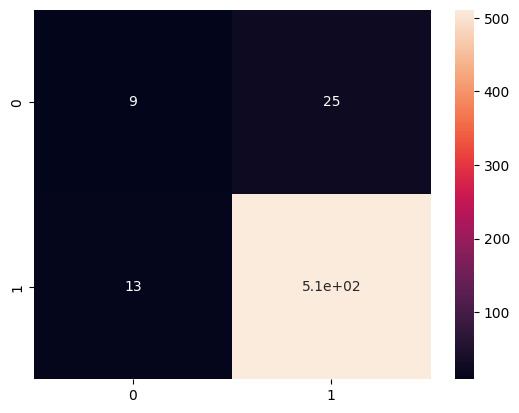

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

y_pred = NB_classifier.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred)
acc_nb=accuracy_score(y_test,y_pred)

sns.heatmap(cm_nb, annot=True)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.29      0.41        34
           1       0.96      0.99      0.97       524

    accuracy                           0.95       558
   macro avg       0.81      0.64      0.69       558
weighted avg       0.94      0.95      0.94       558



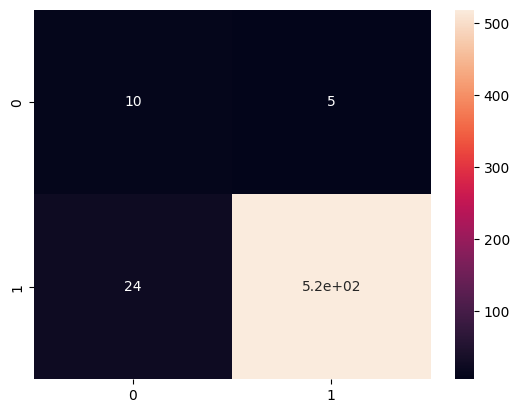

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm_lr = confusion_matrix(y_pred, y_test)
acc_lr=accuracy_score(y_test,y_pred)

sns.heatmap(cm_lr, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.12      0.19        34
           1       0.95      0.99      0.97       524

    accuracy                           0.94       558
   macro avg       0.72      0.56      0.58       558
weighted avg       0.92      0.94      0.92       558



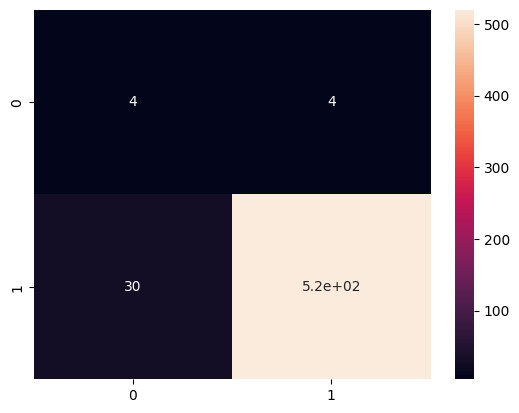

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm_gb = confusion_matrix(y_pred, y_test)
acc_gb=accuracy_score(y_test,y_pred)

sns.heatmap(cm_gb, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11        34
           1       0.94      1.00      0.97       524

    accuracy                           0.94       558
   macro avg       0.97      0.53      0.54       558
weighted avg       0.95      0.94      0.92       558



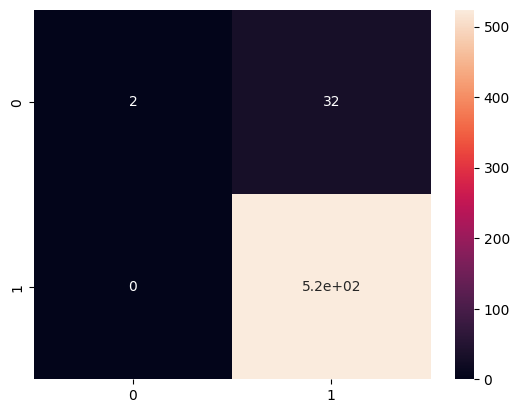

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred)
acc_svc = accuracy_score(y_test,y_pred)

sns.heatmap(cm_svc, annot = True)

print(classification_report(y_test, y_pred))

## Comparing the 4 model performances


In [ ]:

cm_dict = {
    'Naive Bayes' : cm_nb,
    'Logistic Regression' : cm_lr,
    'Gradient Boosting' : cm_gb,
    'SVC' :cm_svc
}

acc_dict = {
    'Naive Bayes' : acc_nb,
    'Logistic Regression' : acc_lr,
    'Gradient Boosting' : acc_gb,
    'SVC' :acc_svc
}

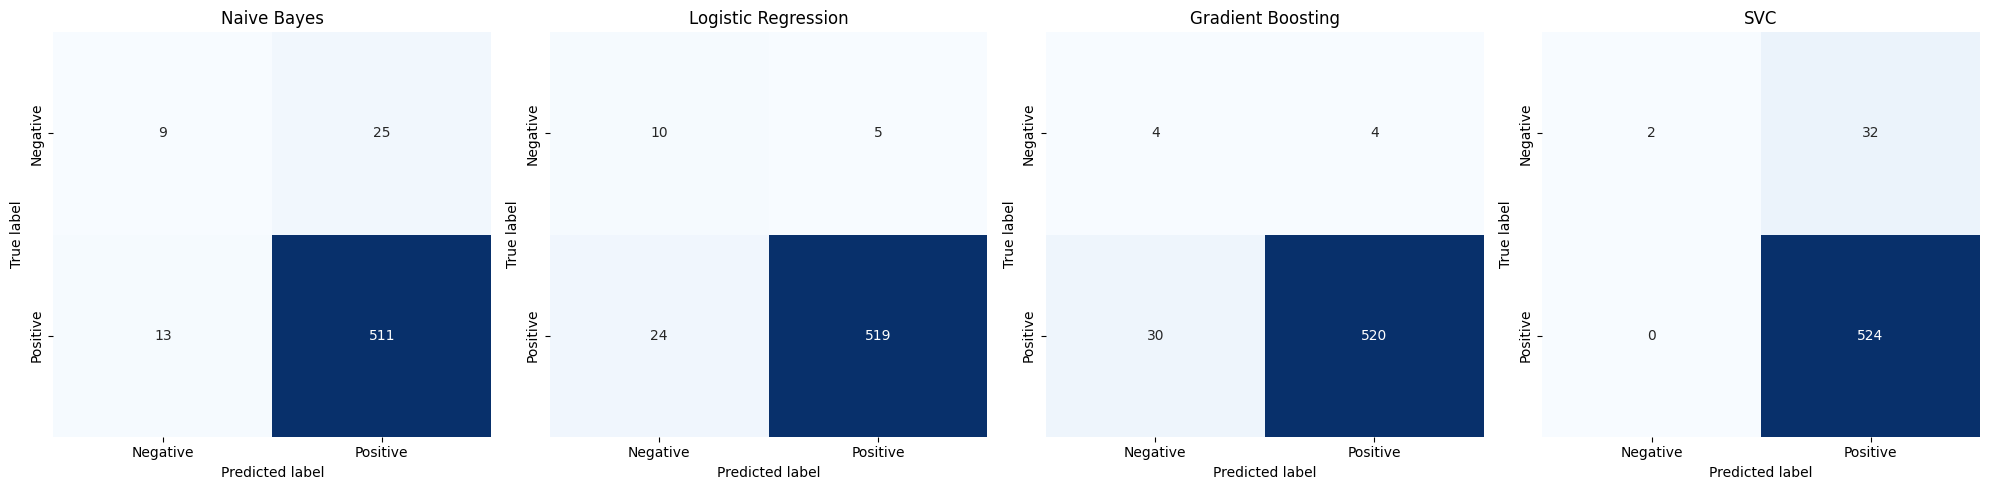

In [ ]:
# Plot confusion matrices
def plot_confusion_matrices(cm_dict):
    fig, axes = plt.subplots(1,4, figsize=(20,5))

    for ax, cm, model_name in zip(axes, cm_dict.values(), cm_dict.keys()):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False,
                    xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        ax.set_title(model_name)
        ax.set_ylabel('True label')
        ax.set_xlabel('Predicted label')
        ax.set_ylim(2, 0)  # Reverse the y-axis for better readability

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_confusion_matrices(cm_dict)

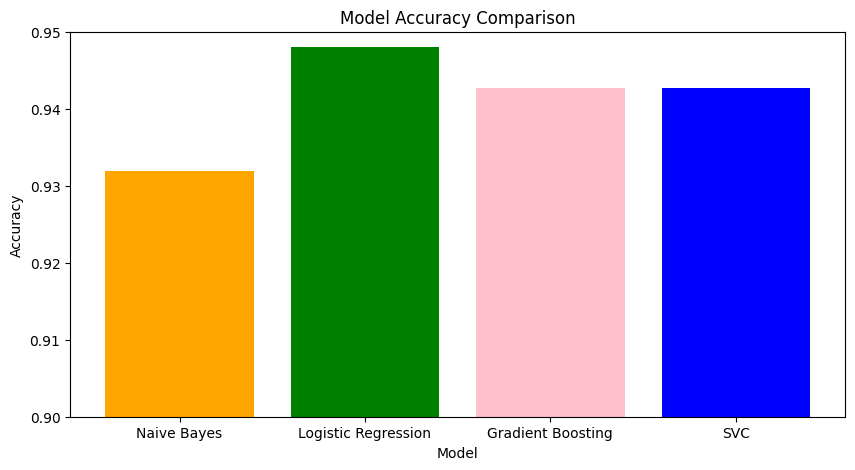

In [ ]:
# Plotting the accuracy scores
plt.figure(figsize=(10, 5))
colors = ['orange', 'green', 'pink', 'blue']
plt.bar(acc_dict.keys(), acc_dict.values(), color=colors)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 0.95)  # Accuracy ranges from 90-95%
plt.show()